In [160]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
data08 = pd.read_csv('Resources/Forbes Global 2000 - 2008.csv')
data09 = pd.read_csv('Resources/Forbes Global 2000 - 2009.csv')
data10 = pd.read_csv('Resources/Forbes Global 2000 - 2010.csv')
data11 = pd.read_csv('Resources/Forbes Global 2000 - 2011.csv')
data12 = pd.read_csv('Resources/Forbes Global 2000 - 2012.csv')
data13 = pd.read_csv('Resources/Forbes Global 2000 - 2013.csv')
data14 = pd.read_csv('Resources/Forbes Global 2000 - 2014.csv')
data15 = pd.read_csv('Resources/Forbes Global 2000 - 2015.csv')
data16 = pd.read_csv('Resources/Forbes Global 2000 - 2016.csv')
data17 = pd.read_csv('Resources/Forbes Global 2000 - 2017.csv')
data18 = pd.read_csv('Resources/Forbes Global 2000 - 2018.csv', error_bad_lines=False)
data19 = pd.read_csv('Resources/Forbes Global 2000 - 2019.csv')
data20 = pd.read_csv('Resources/Forbes Global 2000 - 2020.csv')
data21 = pd.read_csv('Resources/Forbes Global 2000 - 2021.csv')

In [4]:
# checking type of data (currency)
data20

,Rank,Company,Country/Territory,Sales,Profits,Assets,Market Value,Sector,Industry,Year
0,1,ICBC,China,$177.2 B,$45.3 B,"$4,322.5 B",$242.3 B,Financials,Major Banks,2020
1,2,China Construction Bank,China,$162.1 B,$38.9 B,"$3,822 B",$203.8 B,Financials,Major Banks,2020
2,3,JPMorgan Chase,United States,$142.9 B,$30 B,"$3,139.4 B",$291.7 B,Financials,Major Banks,2020
3,4,Berkshire Hathaway,United States,$254.6 B,$81.4 B,$817.7 B,$455.4 B,Financials,Investment Services,2020
4,5,Agricultural Bank of China,China,$148.7 B,$30.9 B,"$3,697.5 B",$147.2 B,Financials,Regional Banks,2020
...,...,...,...,...,...,...,...,...,...,...
1995,1995,Founder Securities,China,$1.4 B,$114.7 M,$18.6 B,$8.3 B,Financials,Investment Services,2020
1996,1995,Merlin Properties SOCIMI S.A,Spain,$594 M,$630.9 M,$14.9 B,$4.3 B,Financials,Investment Services,2020
1997,1998,Heico,United States,$2.1 B,$370.5 M,$3.1 B,$11.8 B,NaN,NaN,2020
1998,1999,W.P. Carey,United States,$1.2 B,$305.2 M,$14.1 B,$11.3 B,NaN,NaN,2020


In [5]:
data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rank               2000 non-null   int64 
 1   Company            2000 non-null   object
 2   Country/Territory  2000 non-null   object
 3   Sales              2000 non-null   object
 4   Profits            2000 non-null   object
 5   Assets             2000 non-null   object
 6   Market Value       2000 non-null   object
 7   Sector             1766 non-null   object
 8   Industry           1767 non-null   object
 9   Year               2000 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 156.4+ KB


In [7]:
# Removing $ from the values
data20["Sales"] = data20["Sales"].str.replace('$','')
data20["Profits"] = data20["Profits"].str.replace('$','')
data20["Assets"] = data20["Assets"].str.replace('$','')
data20["Market Value"] = data20["Market Value"].str.replace('$','')

In [8]:
# Checking formatting was successful
data20.head()

,Rank,Company,Country/Territory,Sales,Profits,Assets,Market Value,Sector,Industry,Year
0,1,ICBC,China,177.2 B,45.3 B,"4,322.5 B",242.3 B,Financials,Major Banks,2020
1,2,China Construction Bank,China,162.1 B,38.9 B,"3,822 B",203.8 B,Financials,Major Banks,2020
2,3,JPMorgan Chase,United States,142.9 B,30 B,"3,139.4 B",291.7 B,Financials,Major Banks,2020
3,4,Berkshire Hathaway,United States,254.6 B,81.4 B,817.7 B,455.4 B,Financials,Investment Services,2020
4,5,Agricultural Bank of China,China,148.7 B,30.9 B,"3,697.5 B",147.2 B,Financials,Regional Banks,2020


In [9]:
# Convert M values to B and removing the characters
value = {'M':"*0.001",'B':'',',':''}
data20['Sales']= data20['Sales'].replace(value,regex=True).map(pd.eval)
data20['Sales'] = round(data20['Sales'],2) # necessary?
data20['Profits']= data20['Profits'].replace(value,regex=True).map(pd.eval)
data20['Profits'] = round(data20['Profits'],2) # necessary?
data20['Assets']= data20['Assets'].replace(value,regex=True).map(pd.eval)
data20['Assets'] = round(data20['Assets'],2) # necessary?
data20['Market Value']= data20['Market Value'].replace(value,regex=True).map(pd.eval)
data20['Market Value'] = round(data20['Market Value'],2) # necessary?

In [10]:
# Checking formatting was successful
data20

,Rank,Company,Country/Territory,Sales,Profits,Assets,Market Value,Sector,Industry,Year
0,1,ICBC,China,177.20,45.30,4322.5,242.3,Financials,Major Banks,2020
1,2,China Construction Bank,China,162.10,38.90,3822.0,203.8,Financials,Major Banks,2020
2,3,JPMorgan Chase,United States,142.90,30.00,3139.4,291.7,Financials,Major Banks,2020
3,4,Berkshire Hathaway,United States,254.60,81.40,817.7,455.4,Financials,Investment Services,2020
4,5,Agricultural Bank of China,China,148.70,30.90,3697.5,147.2,Financials,Regional Banks,2020
...,...,...,...,...,...,...,...,...,...,...
1995,1995,Founder Securities,China,1.40,0.11,18.6,8.3,Financials,Investment Services,2020
1996,1995,Merlin Properties SOCIMI S.A,Spain,0.59,0.63,14.9,4.3,Financials,Investment Services,2020
1997,1998,Heico,United States,2.10,0.37,3.1,11.8,NaN,NaN,2020
1998,1999,W.P. Carey,United States,1.20,0.31,14.1,11.3,NaN,NaN,2020


In [11]:
# checking type of data (currency)
data21

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year
0,1,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B,2021
1,2,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B,2021
2,3,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B,2021
3,4,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B,2021
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B",2021
...,...,...,...,...,...,...,...,...
1995,1996,JTEKT,Japan,$13.1 B,$-34.9 M,$25 B,$3.5 B,2021
1996,1997,Insurance Australia Group,Australia,$5.4 B,$-212 M,$7.1 B,$9.3 B,2021
1997,1997,Sumec Corporation,China,$13 B,$79.2 M,$7.5 B,$1.3 B,2021
1998,1999,Gold Fields,South Africa,$3.9 B,$718.1 M,$2.6 B,$8.9 B,2021


In [12]:
data21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          2000 non-null   int64 
 1   Name          2000 non-null   object
 2   Country       2000 non-null   object
 3   Sales         2000 non-null   object
 4   Profit        2000 non-null   object
 5   Assets        1999 non-null   object
 6   Market Value  2000 non-null   object
 7   Year          2000 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 125.1+ KB


In [13]:
# Removing $ from the values
data21["Sales"] = data21["Sales"].str.replace('$','')
data21["Profit"] = data21["Profit"].str.replace('$','')
data21["Assets"] = data21["Assets"].str.replace('$','')
data21["Market Value"] = data21["Market Value"].str.replace('$','')

In [14]:
# Replaced one NaN value with 0 to allow for formatting
data21 = data21.fillna(0)

In [15]:
# Convert M values to B and removing the characters
value = {'M':"*0.001",'B':'',',':''}
data21['Sales']= data21['Sales'].replace(value,regex=True).map(pd.eval)
data21['Sales'] = round(data21['Sales'],2) # necessary?
data21['Profit']= data21['Profit'].replace(value,regex=True).map(pd.eval)
data21['Profit'] = round(data21['Profit'],2) # necessary?
data21['Assets']= data21['Assets'].replace(value,regex=True).map(pd.eval)
data21['Assets'] = round(data21['Assets'],2) # necessary?
data21['Market Value']= data21['Market Value'].replace(value,regex=True).map(pd.eval)
data21['Market Value'] = round(data21['Market Value'],2) # necessary?

In [16]:
# Checking formatting was successful
data21

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year
0,1,ICBC,China,190.50,45.80,4914.7,249.5,2021
1,2,JPMorgan Chase,United States,136.20,40.40,3689.3,464.8,2021
2,3,Berkshire Hathaway,United States,245.50,42.50,873.7,624.4,2021
3,4,China Construction Bank,China,173.50,39.30,4301.7,210.4,2021
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229.70,49.30,510.3,1897.2,2021
...,...,...,...,...,...,...,...,...
1995,1996,JTEKT,Japan,13.10,-0.03,25.0,3.5,2021
1996,1997,Insurance Australia Group,Australia,5.40,-0.21,7.1,9.3,2021
1997,1997,Sumec Corporation,China,13.00,0.08,7.5,1.3,2021
1998,1999,Gold Fields,South Africa,3.90,0.72,2.6,8.9,2021


In [17]:
# Changing 0 back to NaN value in case needed
data21.replace(0,np.nan, inplace=True)

In [18]:
# Checking if formatting was successful
data21

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year
0,1,ICBC,China,190.50,45.80,4914.7,249.5,2021
1,2,JPMorgan Chase,United States,136.20,40.40,3689.3,464.8,2021
2,3,Berkshire Hathaway,United States,245.50,42.50,873.7,624.4,2021
3,4,China Construction Bank,China,173.50,39.30,4301.7,210.4,2021
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229.70,49.30,510.3,1897.2,2021
...,...,...,...,...,...,...,...,...
1995,1996,JTEKT,Japan,13.10,-0.03,25.0,3.5,2021
1996,1997,Insurance Australia Group,Australia,5.40,-0.21,7.1,9.3,2021
1997,1997,Sumec Corporation,China,13.00,0.08,7.5,1.3,2021
1998,1999,Gold Fields,South Africa,3.90,0.72,2.6,8.9,2021


In [19]:
# Checking all data years to rename columns in the correct order
data14.head()

,Company,Sector,Industry,Continent,Country,Market Value,Sales,Profits,Assets,Rank,Year
0,ICBC,Financials,Major Banks,Asia,China,215.6,148.7,42.7,3124.9,1,2014
1,China Construction Bank,Financials,Regional Banks,Asia,China,174.4,121.3,34.2,2449.5,2,2014
2,Agricultural Bank of China,Financials,Regional Banks,Asia,China,141.1,136.4,27.0,2405.4,3,2014
3,JPMorgan Chase,Financials,Major Banks,North America,United States,229.7,105.7,17.3,2435.3,4,2014
4,Berkshire Hathaway,Financials,Investment Services,North America,United States,309.1,178.8,19.5,493.4,5,2014


In [20]:
# Should column names for the currencies reflect billions? 

In [21]:
# rename the columns for concat
data08.columns = ['Company', 'Industry', 'Country', 'Market Value',
       'Profits', 'Assets', 'Sales', 'Rank', 'Year']
data09.columns = ['Company', 'Industry', 'Country', 'Market Value', 'Profits', 'Assets',
       'Sales', 'Rank', 'Year']
data10.columns = ['Company', 'Industry', 'Country', 'Market Value', 'Sales', 'Profits',
       'Assets', 'Rank', 'Year']
data11.columns = ['Company', 'Industry', 'Country', 'Market Value', 'Sales', 'Profits',
       'Assets', 'Rank', 'Year']
data15.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data16.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data17.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data18.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data19.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data20.columns = ['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets',
       'Market Value', 'Sector', 'Industry', 'Year']
data21.columns = ['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets', 'Market Value',
       'Year']

In [22]:
#combine the dataset together 
frames = [data08, data09, data10, data11, data12, data13, data14, data15, data16, data17, data18, data19, data20, data21]

result = pd.concat(frames)

In [23]:
# Displaying new df
result

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Sector,Continent
0,HSBC Holdings,Banking,United Kingdom,180.81,19.13,2348.98,146.50,1.0,2008,NaN,NaN
1,General Electric,Conglomerates,United States,330.93,22.21,795.34,172.74,2.0,2008,NaN,NaN
2,Bank of America,Banking,United States,176.53,14.98,1715.75,119.19,3.0,2008,NaN,NaN
3,JPMorgan Chase,Banking,United States,136.88,15.37,1562.15,116.35,4.0,2008,NaN,NaN
4,ExxonMobil,Oil & Gas Operations,United States,465.51,40.61,242.08,358.60,5.0,2008,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1995,JTEKT,NaN,Japan,3.50,-0.03,25.00,13.10,1996.0,2021,NaN,NaN
1996,Insurance Australia Group,NaN,Australia,9.30,-0.21,7.10,5.40,1997.0,2021,NaN,NaN
1997,Sumec Corporation,NaN,China,1.30,0.08,7.50,13.00,1997.0,2021,NaN,NaN
1998,Gold Fields,NaN,South Africa,8.90,0.72,2.60,3.90,1999.0,2021,NaN,NaN


In [24]:
#result.to_csv("aroissues-forbes-global-2000-2008-2019/combined.csv")

In [25]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28002 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       28002 non-null  object 
 1   Industry      25514 non-null  object 
 2   Country       28000 non-null  object 
 3   Market Value  27993 non-null  float64
 4   Profits       27988 non-null  float64
 5   Assets        27987 non-null  float64
 6   Sales         27984 non-null  float64
 7   Rank          28000 non-null  float64
 8   Year          28002 non-null  int64  
 9   Sector        13493 non-null  object 
 10  Continent     11993 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 2.6+ MB


In [26]:
# find US data
us = result.loc[result["Country"] == "United States"]

In [27]:
us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7882 entries, 1 to 1999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       7882 non-null   object 
 1   Industry      7146 non-null   object 
 2   Country       7882 non-null   object 
 3   Market Value  7882 non-null   float64
 4   Profits       7875 non-null   float64
 5   Assets        7881 non-null   float64
 6   Sales         7880 non-null   float64
 7   Rank          7882 non-null   float64
 8   Year          7882 non-null   int64  
 9   Sector        3839 non-null   object 
 10  Continent     3420 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 738.9+ KB


In [28]:
# Checking columns
us.columns

Index(['Company', 'Industry', 'Country', 'Market Value', 'Profits', 'Assets',
       'Sales', 'Rank', 'Year', 'Sector', 'Continent'],
      dtype='object')

In [29]:
# Removing columns
us.drop(columns=['Sector','Continent'], inplace=True)

In [30]:
# Checking removal was successful
us

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year
1,General Electric,Conglomerates,United States,330.93,22.21,795.34,172.74,2.0,2008
2,Bank of America,Banking,United States,176.53,14.98,1715.75,119.19,3.0,2008
3,JPMorgan Chase,Banking,United States,136.88,15.37,1562.15,116.35,4.0,2008
4,ExxonMobil,Oil & Gas Operations,United States,465.51,40.61,242.08,358.60,5.0,2008
9,Berkshire Hathaway,Diversified Financials,United States,216.65,13.21,273.16,118.25,10.0,2008
...,...,...,...,...,...,...,...,...,...
1982,Slack Technologies,NaN,United States,24.60,-0.30,22.70,0.90,1983.0,2021
1985,Penn National Gaming,NaN,United States,15.60,-0.67,46.00,3.60,1986.0,2021
1990,Pinnacle Bank,NaN,United States,7.00,0.31,7.30,1.30,1990.0,2021
1994,HubSpot,NaN,United States,24.10,-0.08,12.00,0.88,1995.0,2021


In [31]:
# Identifying unique companies
companies = us["Company"].unique()

In [32]:
# Number of Companies
len(companies)

1262

In [33]:
# Converting to df
companies = pd.DataFrame(companies)

In [34]:
# Displaying full list of companies
companies.to_markdown()

"|      | 0                                                      |\n|-----:|:-------------------------------------------------------|\n|    0 | General Electric                                       |\n|    1 | Bank of America                                        |\n|    2 | JPMorgan Chase                                         |\n|    3 | ExxonMobil                                             |\n|    4 | Berkshire Hathaway                                     |\n|    5 | AT&T                                                   |\n|    6 | Wal-Mart Stores                                        |\n|    7 | Chevron                                                |\n|    8 | American Intl Group                                    |\n|    9 | ConocoPhillips                                         |\n|   10 | Goldman Sachs Group                                    |\n|   11 | Citigroup                                              |\n|   12 | Procter & Gamble                                    

In [35]:
# Grouping by years for companies
years = us.groupby("Year")["Company"].unique()

In [36]:
# list of companies by year
years.head()

Year
2008    [General Electric, Bank of America, JPMorgan C...
2009    [General Electric, ExxonMobil, AT&T, Wal-Mart ...
2010    [JPMorgan Chase, General Electric, Bank of Ame...
2011    [JPMorgan Chase, General Electric, ExxonMobil,...
2012    [Exxon Mobil, JPMorgan Chase, General Electric...
Name: Company, dtype: object

In [37]:
# Displaying full info as dictionary
print(years.to_dict())

{2008: array(['General Electric', 'Bank of America', 'JPMorgan Chase',
       'ExxonMobil', 'Berkshire Hathaway', 'AT&T', 'Wal-Mart Stores',
       'Chevron', 'American Intl Group', 'ConocoPhillips',
       'Goldman Sachs Group', 'Citigroup', 'Procter & Gamble', 'IBM',
       'Wells Fargo', 'Verizon Communications', 'Wachovia',
       'Hewlett-Packard', 'Pfizer', 'Johnson & Johnson', 'Microsoft',
       'MetLife', 'Morgan Stanley', 'Time Warner', 'Altria Group',
       'Cisco Systems', 'Intel', 'Lehman Bros Holdings', 'Boeing',
       'American Express', 'United Technologies', 'UnitedHealth Group',
       'Prudential Financial', 'US Bancorp', 'Walt Disney', 'Coca-Cola',
       'CVS Caremark', 'Comcast', 'Home Depot', 'Allstate', 'PepsiCo',
       'Caterpillar', 'News Corp', 'Valero Energy', 'WellPoint',
       'Kraft Foods', 'Marathon Oil', 'Travelers Cos', 'Target',
       'Merck & Co', 'Abbott Laboratories', 'Dow Chemical', 'Wyeth',
       'Hartford Finl Service', 'Oracle', 'Apple', 

In [38]:
# Identifying the unique industries
industries = us["Industry"].unique()

In [39]:
industries # maybe select a few industries to reduce data for analysis

array(['Conglomerates', 'Banking', 'Oil & Gas Operations',
       'Diversified Financials', 'Telecommunications Services',
       'Retailing', 'Insurance', 'Household & Personal Products',
       'Software & Services', 'Technology Hardware & Equip',
       'Drugs & Biotechnology', 'Media', 'Food Drink & Tobacco',
       'Semiconductors', 'Aerospace & Defense',
       'Health Care Equipment & Svcs', 'Capital Goods', 'Chemicals',
       'Utilities', 'Materials', 'Hotels, Restaurants & Leisure',
       'Transportation', 'Consumer Durables', 'Food Markets',
       'Business Services & Supplies', 'Construction',
       'Food, Drink & Tobacco', 'Major Banks', 'Investment Services',
       'Telecommunications services', 'Discount Stores',
       'Diversified Insurance', 'Computer Services',
       'Household-Personal Care', 'Pharmaceuticals', 'Computer Hardware',
       'Software & Programming', 'Auto & Truck Manufacturers',
       'Medical Equipment & Supplies', 'Beverages',
       'Communic

In [40]:
# Testing a sample on banking industry
financials = us.loc[(us["Industry"] == "Banking") | (us["Industry"] == "Major Banks") | (us["Industry"] == "Regional Banks")
              | (us["Industry"] == "Diversified Financials") | (us["Industry"] == "Investment Services")
              | (us["Industry"] == "Consumer Financial Services")]
financials

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year
2,Bank of America,Banking,United States,176.53,14.98,1715.75,119.19,3.0,2008
3,JPMorgan Chase,Banking,United States,136.88,15.37,1562.15,116.35,4.0,2008
9,Berkshire Hathaway,Diversified Financials,United States,216.65,13.21,273.16,118.25,10.0,2008
22,Goldman Sachs Group,Diversified Financials,United States,67.16,11.60,1119.80,87.97,23.0,2008
23,Citigroup,Banking,United States,123.44,3.62,2187.63,159.23,24.0,2008
...,...,...,...,...,...,...,...,...,...
1775,CIT Group,Consumer Financial Services,United States,1.90,-0.21,58.90,3.20,1776.0,2020
1807,First Horizon National,Regional Banks,United States,2.80,0.35,43.50,1.70,1807.0,2020
1860,Cullen/Frost Bankers,Regional Banks,United States,4.50,0.38,34.10,1.30,1861.0,2020
1958,Wintrust Financial,Regional Banks,United States,2.40,0.33,38.80,1.80,1958.0,2020


In [41]:
# Resetting index
financials.reset_index(inplace=True, drop=True)
financials

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year
0,Bank of America,Banking,United States,176.53,14.98,1715.75,119.19,3.0,2008
1,JPMorgan Chase,Banking,United States,136.88,15.37,1562.15,116.35,4.0,2008
2,Berkshire Hathaway,Diversified Financials,United States,216.65,13.21,273.16,118.25,10.0,2008
3,Goldman Sachs Group,Diversified Financials,United States,67.16,11.60,1119.80,87.97,23.0,2008
4,Citigroup,Banking,United States,123.44,3.62,2187.63,159.23,24.0,2008
...,...,...,...,...,...,...,...,...,...
863,CIT Group,Consumer Financial Services,United States,1.90,-0.21,58.90,3.20,1776.0,2020
864,First Horizon National,Regional Banks,United States,2.80,0.35,43.50,1.70,1807.0,2020
865,Cullen/Frost Bankers,Regional Banks,United States,4.50,0.38,34.10,1.30,1861.0,2020
866,Wintrust Financial,Regional Banks,United States,2.40,0.33,38.80,1.80,1958.0,2020


In [42]:
financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       868 non-null    object 
 1   Industry      868 non-null    object 
 2   Country       868 non-null    object 
 3   Market Value  868 non-null    float64
 4   Profits       867 non-null    float64
 5   Assets        868 non-null    float64
 6   Sales         867 non-null    float64
 7   Rank          868 non-null    float64
 8   Year          868 non-null    int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 61.2+ KB


In [43]:
# Finding the profit max from all years
financials_highest_profits = financials.loc[financials.groupby("Year")["Profits"].idxmax()]
financials_highest_profits

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year
1,JPMorgan Chase,Banking,United States,136.880,15.370,1562.150,116.350,4.0,2008
101,Berkshire Hathaway,Diversified Financials,United States,122.110,4.990,267.400,107.790,19.0,2009
186,Goldman Sachs Group,Diversified Financials,United States,84.950,13.390,849.000,51.670,25.0,2010
262,JPMorgan Chase,Major Banks,United States,182.200,17.400,2117.600,115.500,1.0,2011
322,JPMorgan Chase,Major Banks,United States,170.100,19.000,2265.800,110.800,2.0,2012
377,JPMorgan Chase,Major Banks,United States,191.400,21.300,2359.100,108.200,3.0,2013
445,Fannie Mae,Investment Services,United States,4.600,84.000,3270.100,122.900,355.0,2014
482,Wells Fargo,Major Banks,United States,278.273,23.057,1701.408,90.403,10.0,2015
536,Berkshire Hathaway,Investment Services,United States,360.145,24.083,561.068,210.821,4.0,2016
599,JPMorgan Chase,Major Banks,United States,306.616,24.231,2512.986,102.494,4.0,2017


In [44]:
# Finding the profit min from all years
financials_lowest_profits = financials.loc[financials.groupby("Year")["Profits"].idxmin()]
financials_lowest_profits

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year
20,Merrill Lynch,Diversified Financials,United States,48.020,-7.7800,1020.050,62.680,431.0,2008
125,Fannie Mae,Diversified Financials,United States,0.460,-58.3000,912.400,43.120,824.0,2009
217,Fannie Mae,Diversified Financials,United States,1.100,-71.9700,869.140,29.070,849.0,2010
292,Fannie Mae,Investment Services,United States,0.464,-14.0000,3222.000,154.300,790.0,2011
351,Fannie Mae,Investment Services,United States,1.800,-16.9000,3211.500,137.700,795.0,2012
414,CIT Group,Consumer Financial Services,United States,9.000,-0.6000,44.000,4.000,1265.0,2013
477,Interactive Brokers Group,Investment Services,United States,1.200,0.0000,37.900,1.100,1806.0,2014
528,Interactive Brokers Group,Investment Services,United States,1.986,0.0445,43.385,1.100,1751.0,2015
588,INTL FCStone,Regional Banks,United States,0.539,0.0539,5.217,24.469,1630.0,2016
647,CIT Group,Consumer Financial Services,United States,8.799,-0.8609,64.170,4.351,1272.0,2017


In [45]:
financials['Company'].unique()

array(['Bank of America', 'JPMorgan Chase', 'Berkshire Hathaway',
       'Goldman Sachs Group', 'Citigroup', 'Wells Fargo', 'Wachovia',
       'Morgan Stanley', 'Lehman Bros Holdings', 'American Express',
       'US Bancorp', 'Bank of New York Mellon', 'Capital One Financial',
       'SunTrust Banks', 'State Street', 'PNC Financial Services', 'BB&T',
       'Regions Financial', 'Principal Financial', 'Charles Schwab',
       'Merrill Lynch', 'Fifth Third Bancorp', 'Ameriprise Financial',
       'Fannie Mae', 'KeyCorp', 'Freddie Mac', 'Northern Trust',
       'BlackRock', 'Washington Mutual', 'ProLogis', 'Franklin Resources',
       'National City', 'M&T Bank', 'Simon Property Group',
       'NYSE Euronext', 'SLM', 'CME Group', 'Comerica', 'Vornado Realty',
       'Marshall & Ilsley', 'Host Hotels & Resorts', 'MasterCard',
       'Countrywide Financial', 'TD Ameritrade Holding',
       'Equity Residential', 'Legg Mason', 'Annaly Capital Mgmt',
       'Western Union', 'Boston Properties'

In [53]:
std_financials = financials.groupby('Company').aggregate({'Profits':["mean",
                                "median", "var", "std", "sem"]})
std_financials

Profits                                      
                               mean  median       var       std       sem
Company                                                                  
AGNC Investment           -0.032250  0.3760  1.884257  1.372682  0.686341
AMB Property               0.310000  0.3100       NaN       NaN       NaN
Affiliated Managers Group  0.513080  0.4713  0.015108  0.122915  0.054969
Ally Financial             1.073750  1.0335  0.017709  0.133075  0.066537
AmeriCredit                0.230000  0.2300       NaN       NaN       NaN
...                             ...     ...       ...       ...       ...
Western Alliance Bancorp.  0.448000  0.4480  0.000288  0.016971  0.012000
Western Union              0.947980  0.9099  0.020772  0.144125  0.064454
Wintrust Financial         0.340000  0.3400  0.000200  0.014142  0.010000
Zions Bancorp              0.235285  0.4000  0.300089  0.547804  0.151933
iStar Financial            0.240000  0.2400       NaN       NaN       NaN

[154 rows x 5 columns]

In [131]:
profit_bins = [-100, 0, 5, 10, 100]
labels = ["Profit Loss/No Profit", "Low Profit", "Good Profit", "High Profit"]
financials["Profit Range"] = pd.cut(financials['Profits'], profit_bins, labels=labels)
financials

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range
0,Bank of America,Banking,United States,176.53,14.98,1715.75,119.19,3.0,2008,High Profit
1,JPMorgan Chase,Banking,United States,136.88,15.37,1562.15,116.35,4.0,2008,High Profit
2,Berkshire Hathaway,Diversified Financials,United States,216.65,13.21,273.16,118.25,10.0,2008,High Profit
3,Goldman Sachs Group,Diversified Financials,United States,67.16,11.60,1119.80,87.97,23.0,2008,High Profit
4,Citigroup,Banking,United States,123.44,3.62,2187.63,159.23,24.0,2008,Low Profit
...,...,...,...,...,...,...,...,...,...,...
863,CIT Group,Consumer Financial Services,United States,1.90,-0.21,58.90,3.20,1776.0,2020,Profit Loss/No Profit
864,First Horizon National,Regional Banks,United States,2.80,0.35,43.50,1.70,1807.0,2020,Low Profit
865,Cullen/Frost Bankers,Regional Banks,United States,4.50,0.38,34.10,1.30,1861.0,2020,Low Profit
866,Wintrust Financial,Regional Banks,United States,2.40,0.33,38.80,1.80,1958.0,2020,Low Profit


In [148]:
years = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

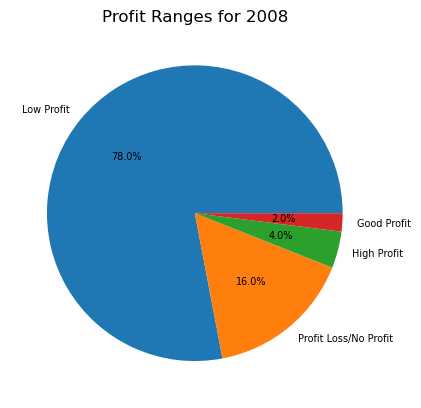

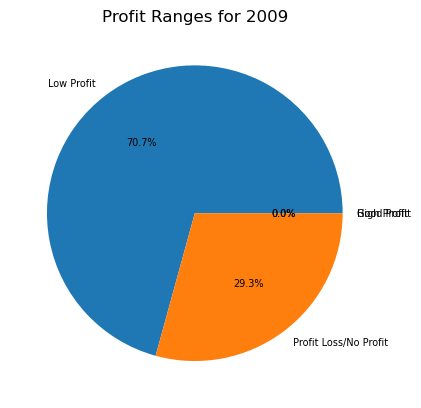

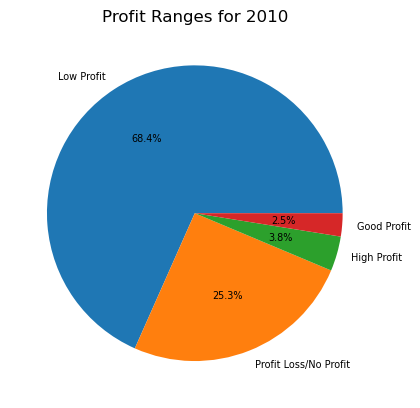

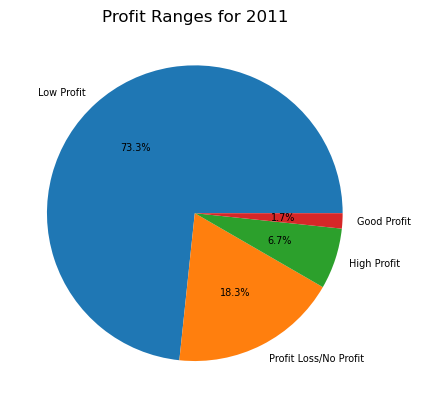

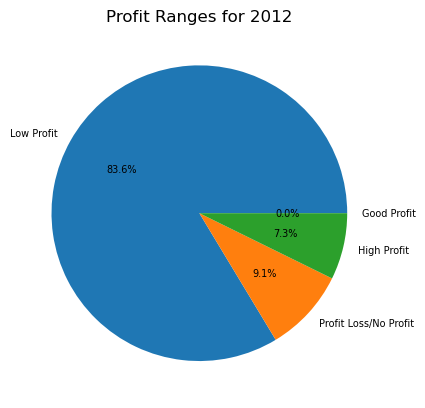

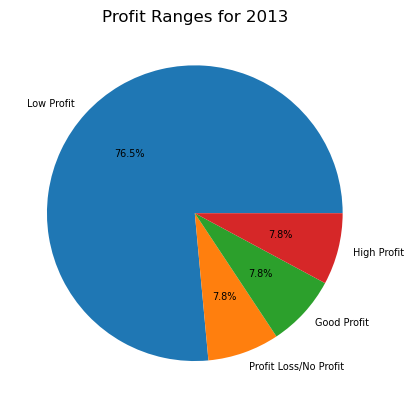

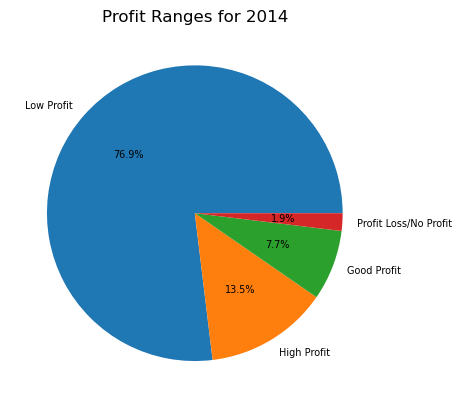

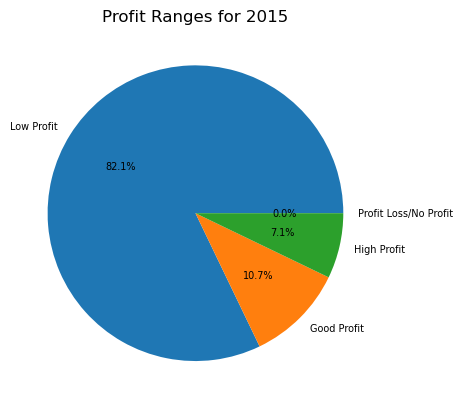

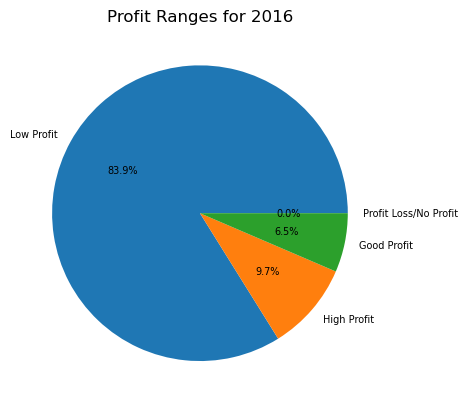

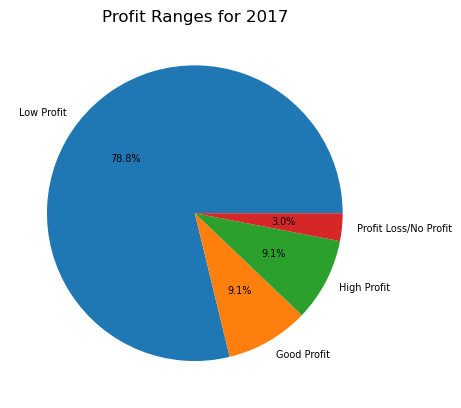

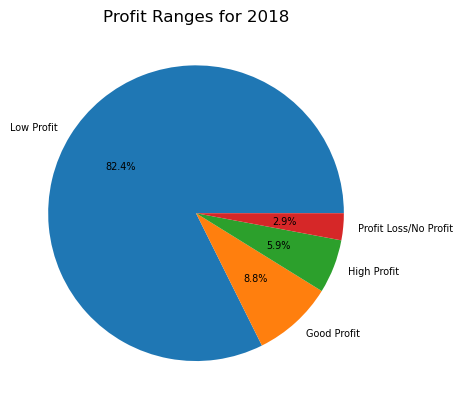

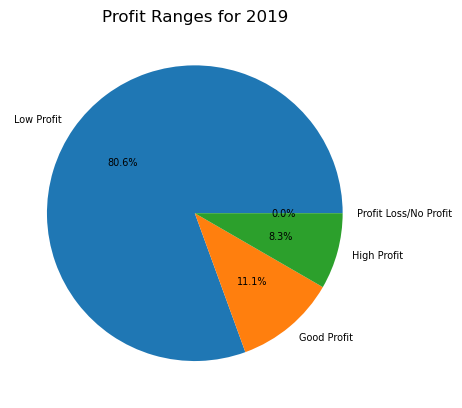

In [165]:
for year in years:
    profit_year = financials[financials['Year'] == year]
    ranges = profit_year['Profit Range'].value_counts()
    plt.pie(ranges.values,labels=ranges.index.values,autopct='%1.1f%%',radius=1,textprops={'fontsize': 7})
    plt.title(f"Profit Ranges for {year}", pad=5)
    plt.show()